In [1]:
from facenet_pytorch import MTCNN

In [2]:
import cv2 
from PIL import Image
import numpy as np 
from matplotlib import pyplot as plt 
from tqdm.notebook import tqdm
import matplotlib.image as mpimg

In [3]:
help(MTCNN)

al(
 |            (0): Linear(in_features=2, out_features=2, bias=True)
 |            (1): Linear(in_features=2, out_features=2, bias=True)
 |          )
 |          Sequential(
 |            (0): Linear(in_features=2, out_features=2, bias=True)
 |            (1): Linear(in_features=2, out_features=2, bias=True)
 |          )
 |  
 |  bfloat16(self: ~T) -> ~T
 |      Casts all floating point parameters and buffers to ``bfloat16`` datatype.
 |      
 |      Returns:
 |          Module: self
 |  
 |  buffers(self, recurse: bool = True) -> Iterator[torch.Tensor]
 |      Returns an iterator over module buffers.
 |      
 |      Args:
 |          recurse (bool): if True, then yields buffers of this module
 |              and all submodules. Otherwise, yields only buffers that
 |              are direct members of this module.
 |      
 |      Yields:
 |          torch.Tensor: module buffer
 |      
 |      Example::
 |      
 |          >>> for buf in model.buffers():
 |          >>>     pr

In [4]:
os.getcwd()

'x:\\bangkit-project\\ml-project'

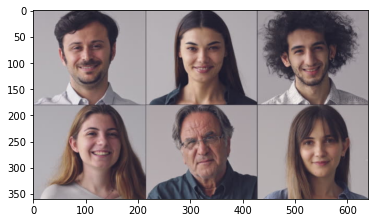

In [5]:
mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device='cuda:0')
image = "test_image/6_faces.jpg"
image = mpimg.imread(image)
image = Image.fromarray(image)
plt.imshow(image)

<ipython-input-10-3c8f81178571>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


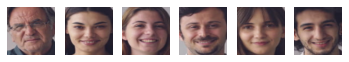

In [10]:
# Detect face 

faces = mtcnn(image)

#Generate folder
fcount = 0
while os.path.exists("ExtractedFaceFolder" + str(fcount)) == True:
    fcount = fcount + 1
    if os.path.exists("ExtractedFaceFolder" + str(fcount)) == False:
        break
    else:
        continue
os.mkdir("ExtractedFaceFolder" + str(fcount))
path = "ExtractedFaceFolder" + str(fcount)

# Visualize
count = 0
fig, axes = plt.subplots(1, len(faces))
for face, ax in zip(faces, axes):
    face = face.permute(1, 2, 0).int().numpy()
    ax.imshow(face)
    image_to_save = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    cv2.imwrite(os.path.join(path, "face"+str(count)+".jpg"),face)
    count = count + 1
    ax.axis('off')
fig.show()